In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


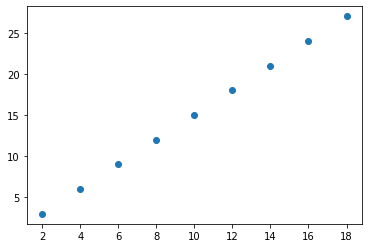

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = tf.constant([2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0])

# Create labels
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0])

# Visualize it
plt.scatter(X, y);

In [3]:
input_shape = X[0].shape 


output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [4]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [5]:
tf.random.set_seed(42)

# creating model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 472ms/step - loss: 9.2994 - mae: 9.2994
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 8.2894 - mae: 8.2894
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 7.2794 - mae: 7.2794
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 6.2694 - mae: 6.2694
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 5.2594 - mae: 5.2594


In [6]:
model.predict([20.0])

array([[21.451199]], dtype=float32)

# The above predicted is showing the value to be 21.45 but it should be 30 
therefore the model should be trained more or with more data


# Improving a model

1. increasing the number of epochs



In [8]:
tf.random.set_seed(42)

# Create a model 
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model
model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model with more epochs
model1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 465ms/step - loss: 9.2994 - mae: 9.2994
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2894 - mae: 8.2894
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 7.2794 - mae: 7.2794
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 6.2694 - mae: 6.2694
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 5.2594 - mae: 5.2594
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 4.2494 - mae: 4.2494
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 3.2394 - mae: 3.2394
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 2.2294 - mae: 2.2294
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 1.2194 - mae: 1.2194
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2161 - mae: 0.2161
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - l

In [9]:
# predicting 
model1.predict([20.0])

array([[31.227867]], dtype=float32)

**This time the model prediction is better**


# Creating a new dataset

In [11]:
X = np.arange(-100, 100, 5)
X

array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95])

In [12]:
y = np.arange(-90, 110, 5)
y

array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105])

In [18]:
X_train = X[:30] #(80% of data)
y_train = y[:30]

X_test = X[30:] #(20% of data)
y_test = y[30:]

len(X_train), len(X_test)

(30, 10)

In [16]:
len(X)

40

# Visualizing the data

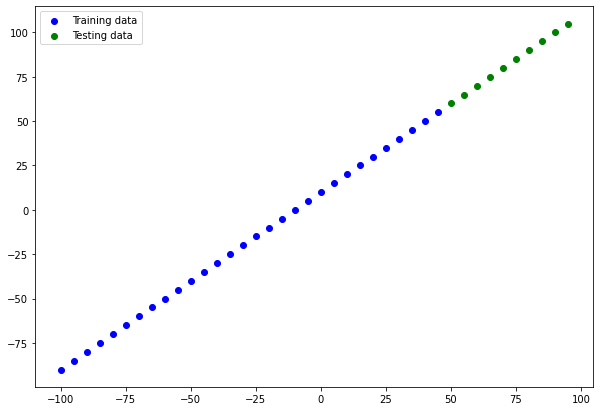

In [19]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [23]:
tf.random.set_seed(42)

# Create a model (same as above)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1])
  ])

# Compile model (same as above)
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 257ms/step - loss: 16.1727 - mae: 16.1727
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9481 - mae: 8.9481
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7873 - mae: 11.7873
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1375 - mae: 11.1375
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1108 - mae: 9.1108
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9505 - mae: 11.9505
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2481 - mae: 8.2481
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9378 - mae: 11.9378
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2448 - mae: 8.2448
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 11.9252 - mae: 11.9252
Epoch 11/100
1/1 [==============================] - 0s 13ms/step

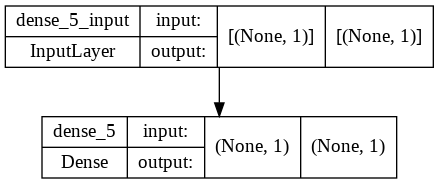

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)



# Visualizing the predictions

In [27]:
y_preds = model_1.predict(X_test)

In [28]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
    
  
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

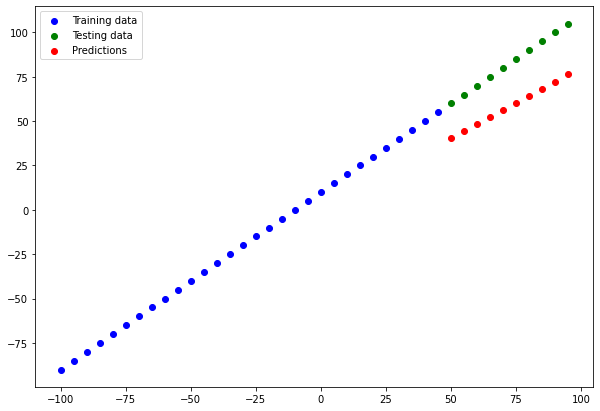

In [29]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [30]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [31]:
# Removing the 1 dimension
y_preds.squeeze().shape

(10,)

In [32]:
y_test, y_preds.squeeze()

(array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105]),
 array([40.46367 , 44.447304, 48.43094 , 52.41457 , 56.398205, 60.381836,
        64.36547 , 68.349106, 72.33274 , 76.31637 ], dtype=float32))

# Calculating the MAE and MSE

In [33]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=24.10998>

In [34]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=589.81335>

In [35]:
def mae(y_test, y_pred):
  
  #Calculuates mean absolute error between y_test and y_preds.
  
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  
  #Calculates mean squared error between y_test and y_preds.
 
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# Imporving the model

In [36]:
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 263ms/step - loss: 16.1727 - mae: 16.1727
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9481 - mae: 8.9481
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7873 - mae: 11.7873
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1375 - mae: 11.1375
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.1108 - mae: 9.1108
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9505 - mae: 11.9505
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2481 - mae: 8.2481
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9378 - mae: 11.9378
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2448 - mae: 8.2448
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9252 - mae: 11.9252
Epoch 11/100
1/1 [==============================] - 0s 5ms/step -

In [40]:
tf.expand_dims(X_train, axis=-1)

<tf.Tensor: shape=(30, 1), dtype=int64, numpy=
array([[-100],
       [ -95],
       [ -90],
       [ -85],
       [ -80],
       [ -75],
       [ -70],
       [ -65],
       [ -60],
       [ -55],
       [ -50],
       [ -45],
       [ -40],
       [ -35],
       [ -30],
       [ -25],
       [ -20],
       [ -15],
       [ -10],
       [  -5],
       [   0],
       [   5],
       [  10],
       [  15],
       [  20],
       [  25],
       [  30],
       [  35],
       [  40],
       [  45]])>

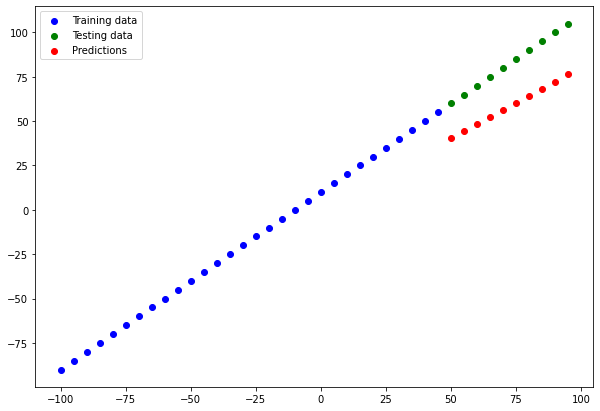

In [41]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [42]:
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(24.10998, 589.81335)

In [43]:
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

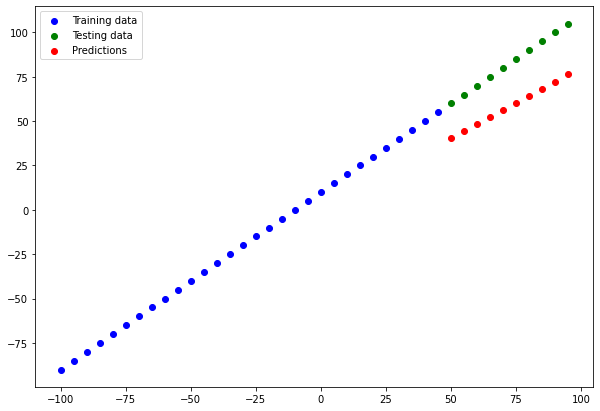

In [44]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [49]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(24.10998, 589.81335)

In [45]:
tf.random.set_seed(42)

# Replicate model_2
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

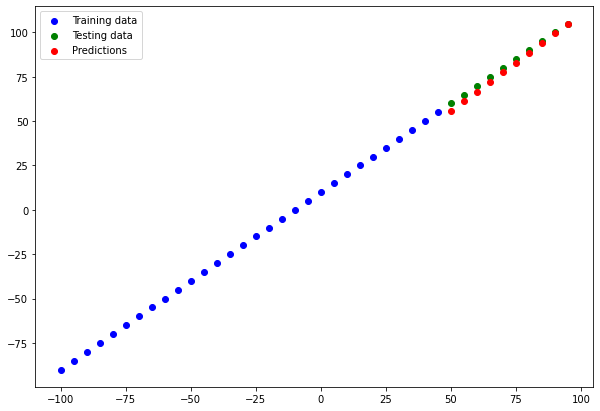

In [46]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [47]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(2.2048297, 6.663087)

In [51]:
model_results = [["model_2", mae_1, mse_1],
                 ["model_3", mae_2, mse_2],
                 ["model_4", mae_3, mae_3]]

model_results

[['model_2', 24.10998, 589.81335],
 ['model_3', 24.10998, 589.81335],
 ['model_4', 2.2048297, 2.2048297]]

In [52]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_2,24.10998,589.813354
1,model_3,24.10998,589.813354
2,model_4,2.20483,2.204830


**The model_4 is the best fitting model**